In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


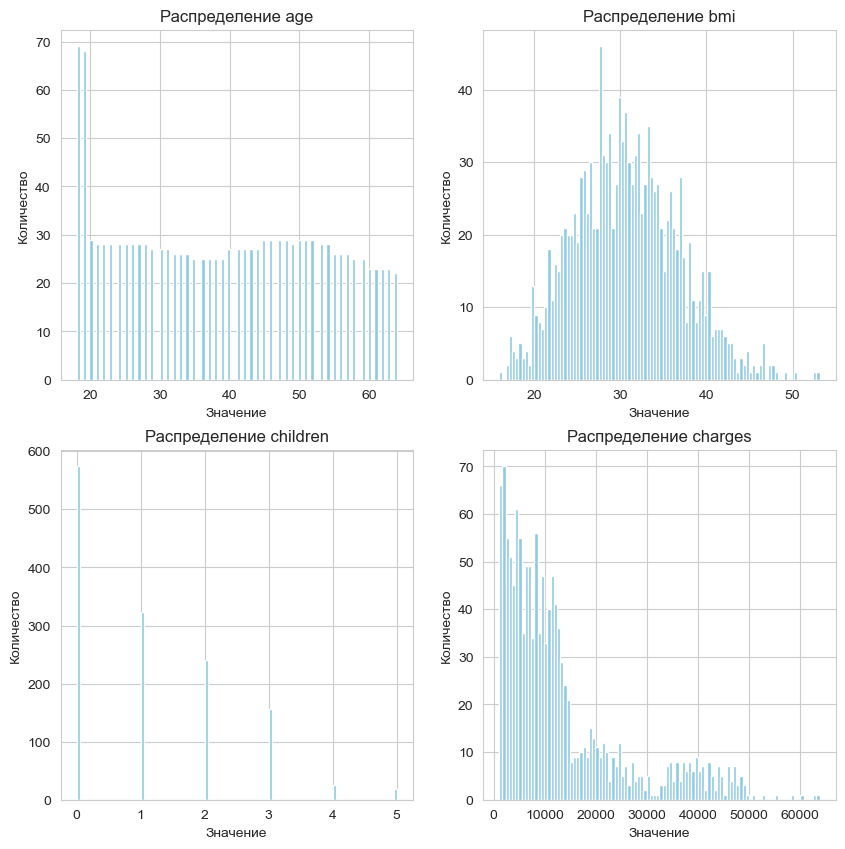

In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    for j in range(2):
        axs[i, j].hist(df[numerical_columns[i * 2 + j]], bins=100, color='#8ecae6')
        axs[i, j].set_title(f'Распределение {numerical_columns[i * 2 + j]}')
        axs[i, j].set_xlabel('Значение')
        axs[i, j].set_ylabel('Количество')


plt.show()

Меры центральной тенденции и меры разброса для bmi:
Среднее значение: 30.66
Медиана: 30.40
Мода: 32.30
Стандартное отклонение: 6.10
Дисперсия: 37.19

Меры центральной тенденции и меры разброса для charges:
Среднее значение: 13270.42
Медиана: 9382.03
Мода: 1639.56
Стандартное отклонение: 12110.01
Дисперсия: 146652372.15


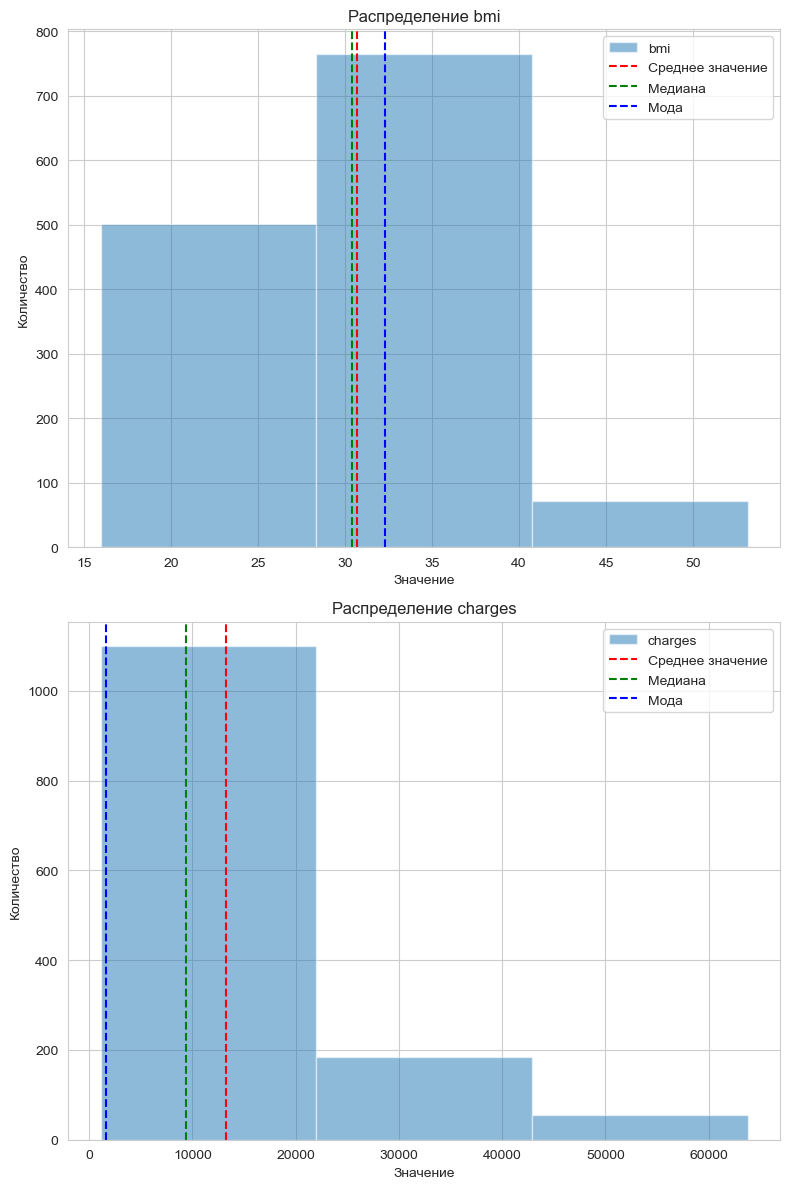

In [4]:
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()
bmi_mode = df['bmi'].mode().iloc[0]
bmi_std = df['bmi'].std()
bmi_var = df['bmi'].var()

charges_mean = df['charges'].mean()
charges_median = df['charges'].median()
charges_mode = df['charges'].mode().iloc[0]
charges_std = df['charges'].std()
charges_var = df['charges'].var()

print("Меры центральной тенденции и меры разброса для bmi:")
print(f"Среднее значение: {bmi_mean:.2f}")
print(f"Медиана: {bmi_median:.2f}")
print(f"Мода: {bmi_mode:.2f}")
print(f"Стандартное отклонение: {bmi_std:.2f}")
print(f"Дисперсия: {bmi_var:.2f}")

print("\nМеры центральной тенденции и меры разброса для charges:")
print(f"Среднее значение: {charges_mean:.2f}")
print(f"Медиана: {charges_median:.2f}")
print(f"Мода: {charges_mode:.2f}")
print(f"Стандартное отклонение: {charges_std:.2f}")
print(f"Дисперсия: {charges_var:.2f}")

fig, axs = plt.subplots(2, 1, figsize=(8, 6*2))

axs[0].hist(df['bmi'], bins=3, alpha=0.5, label='bmi')
axs[0].axvline(bmi_mean, color='r', linestyle='--', label='Среднее значение')
axs[0].axvline(bmi_median, color='g', linestyle='--', label='Медиана')
axs[0].axvline(bmi_mode, color='b', linestyle='--', label='Мода')
axs[0].set_title('Распределение bmi')
axs[0].set_xlabel('Значение')
axs[0].set_ylabel('Количество')
axs[0].legend()

axs[1].hist(df['charges'], bins=3, alpha=0.5, label='charges')
axs[1].axvline(charges_mean, color='r', linestyle='--', label='Среднее значение')
axs[1].axvline(charges_median, color='g', linestyle='--', label='Медиана')
axs[1].axvline(charges_mode, color='b', linestyle='--', label='Мода')
axs[1].set_title('Распределение charges')
axs[1].set_xlabel('Значение')
axs[1].set_ylabel('Количество')
axs[1].legend()

plt.tight_layout()
plt.show()

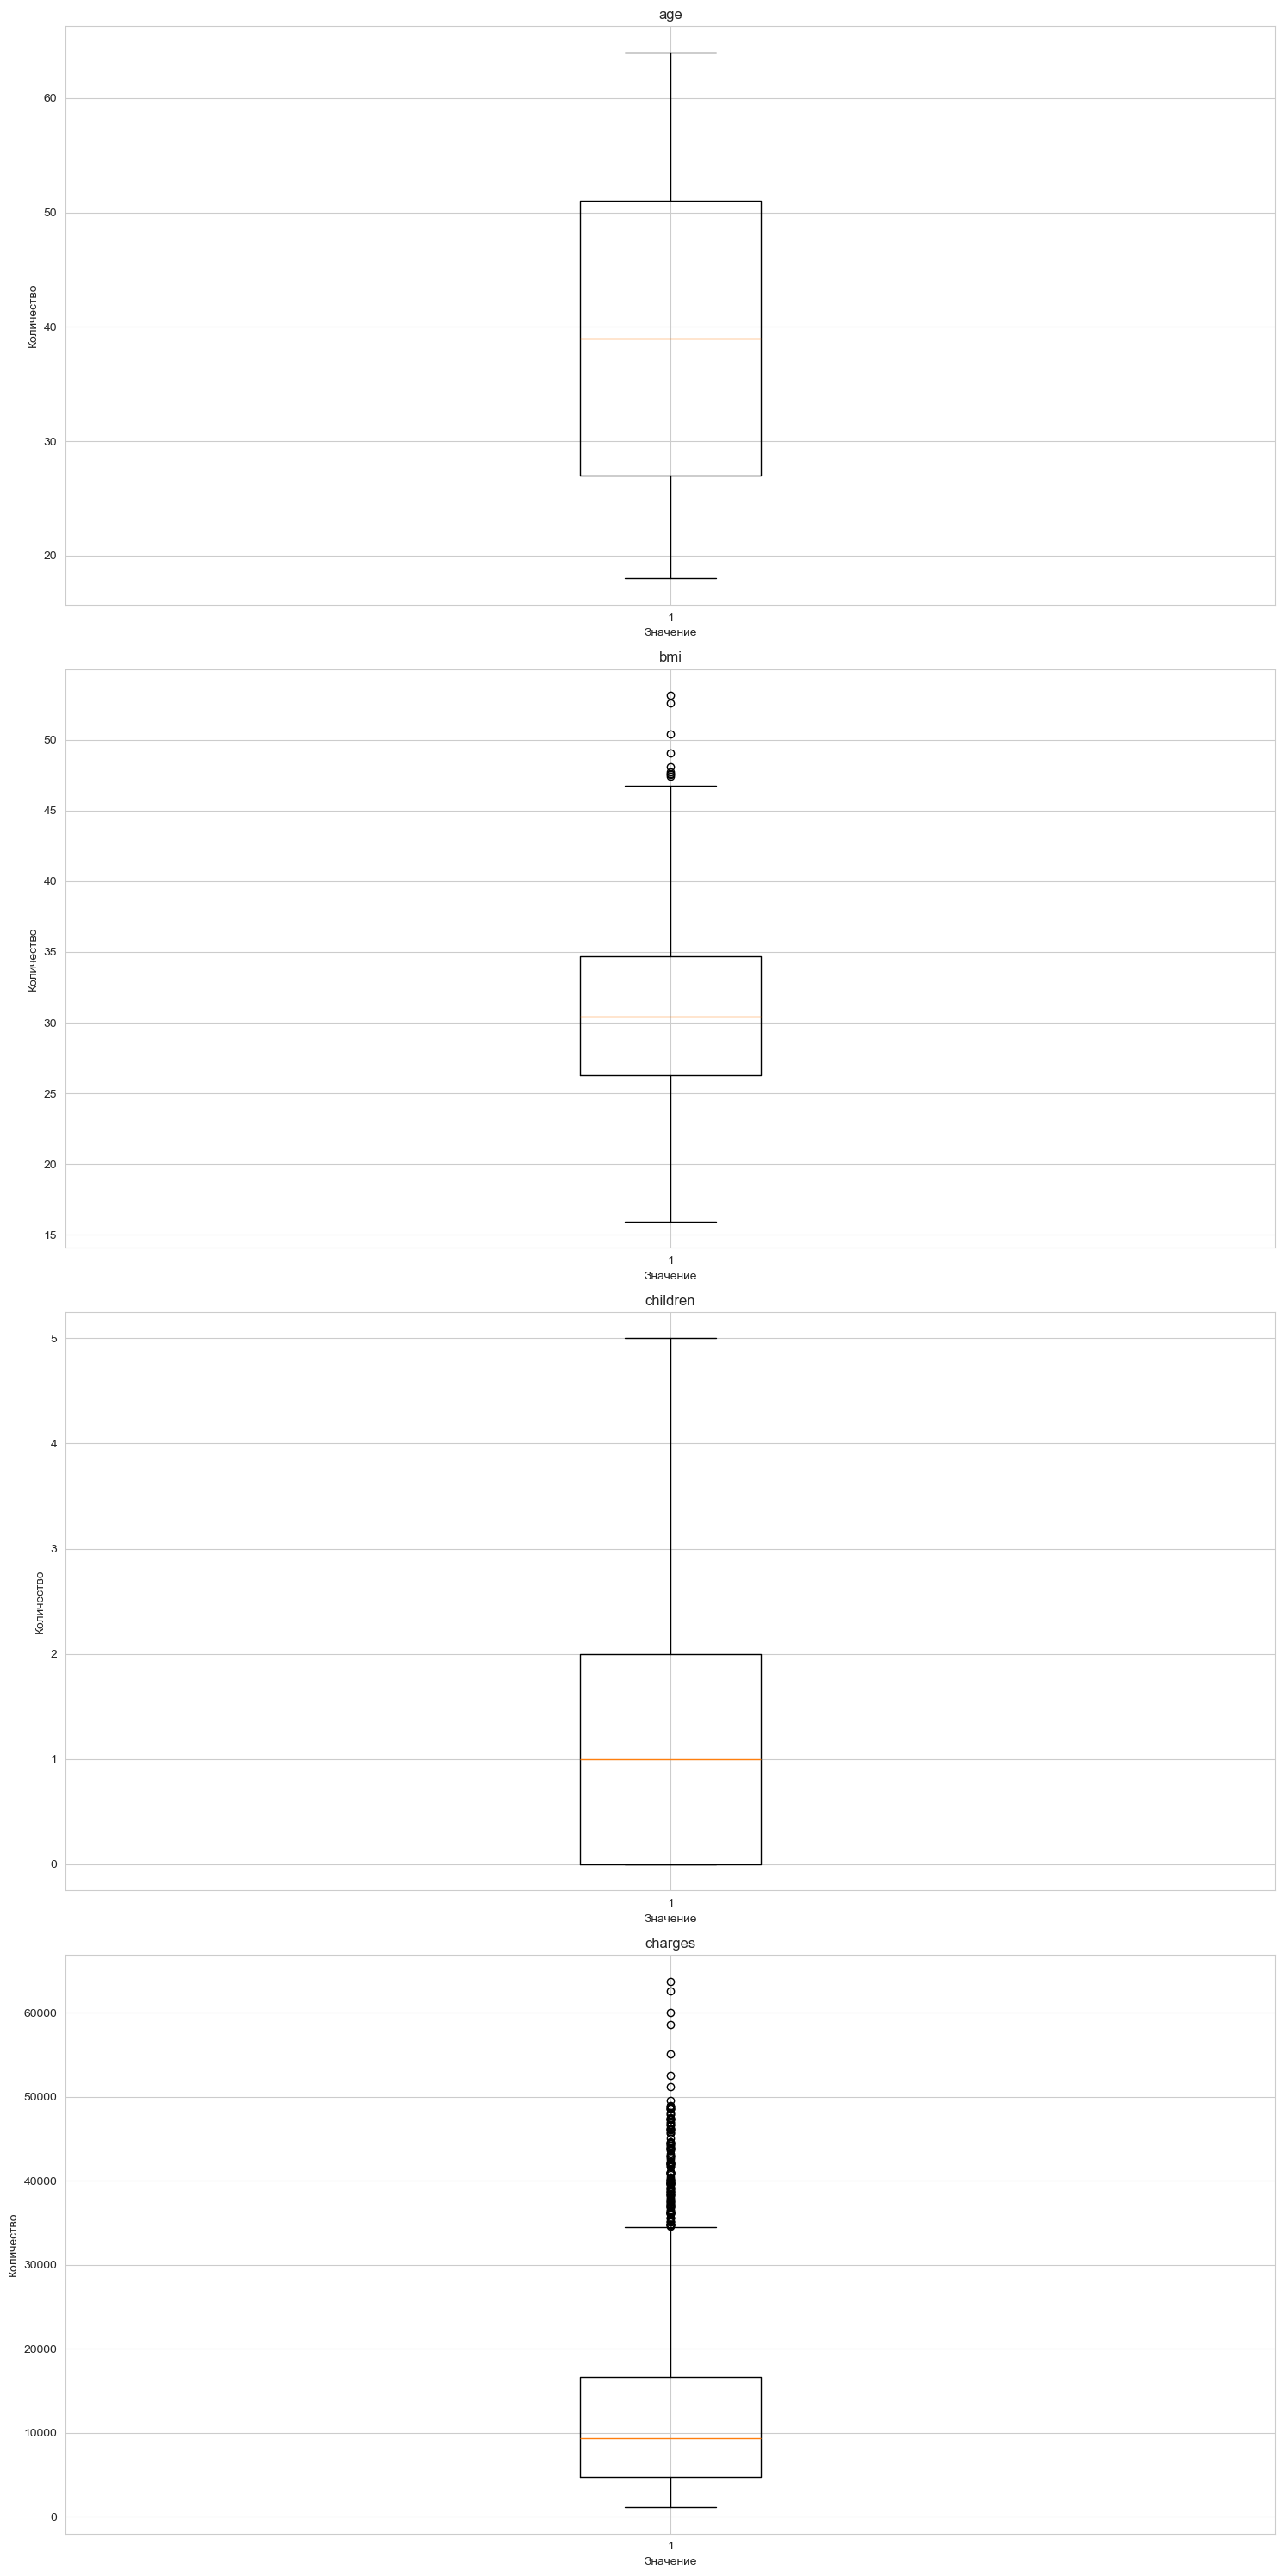

In [5]:
fig, axs = plt.subplots(len(numerical_columns), 1, figsize=(15, 30))

for i, column in enumerate(numerical_columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Значение')
    axs[i].set_ylabel('Количество')

plt.tight_layout()
plt.show()

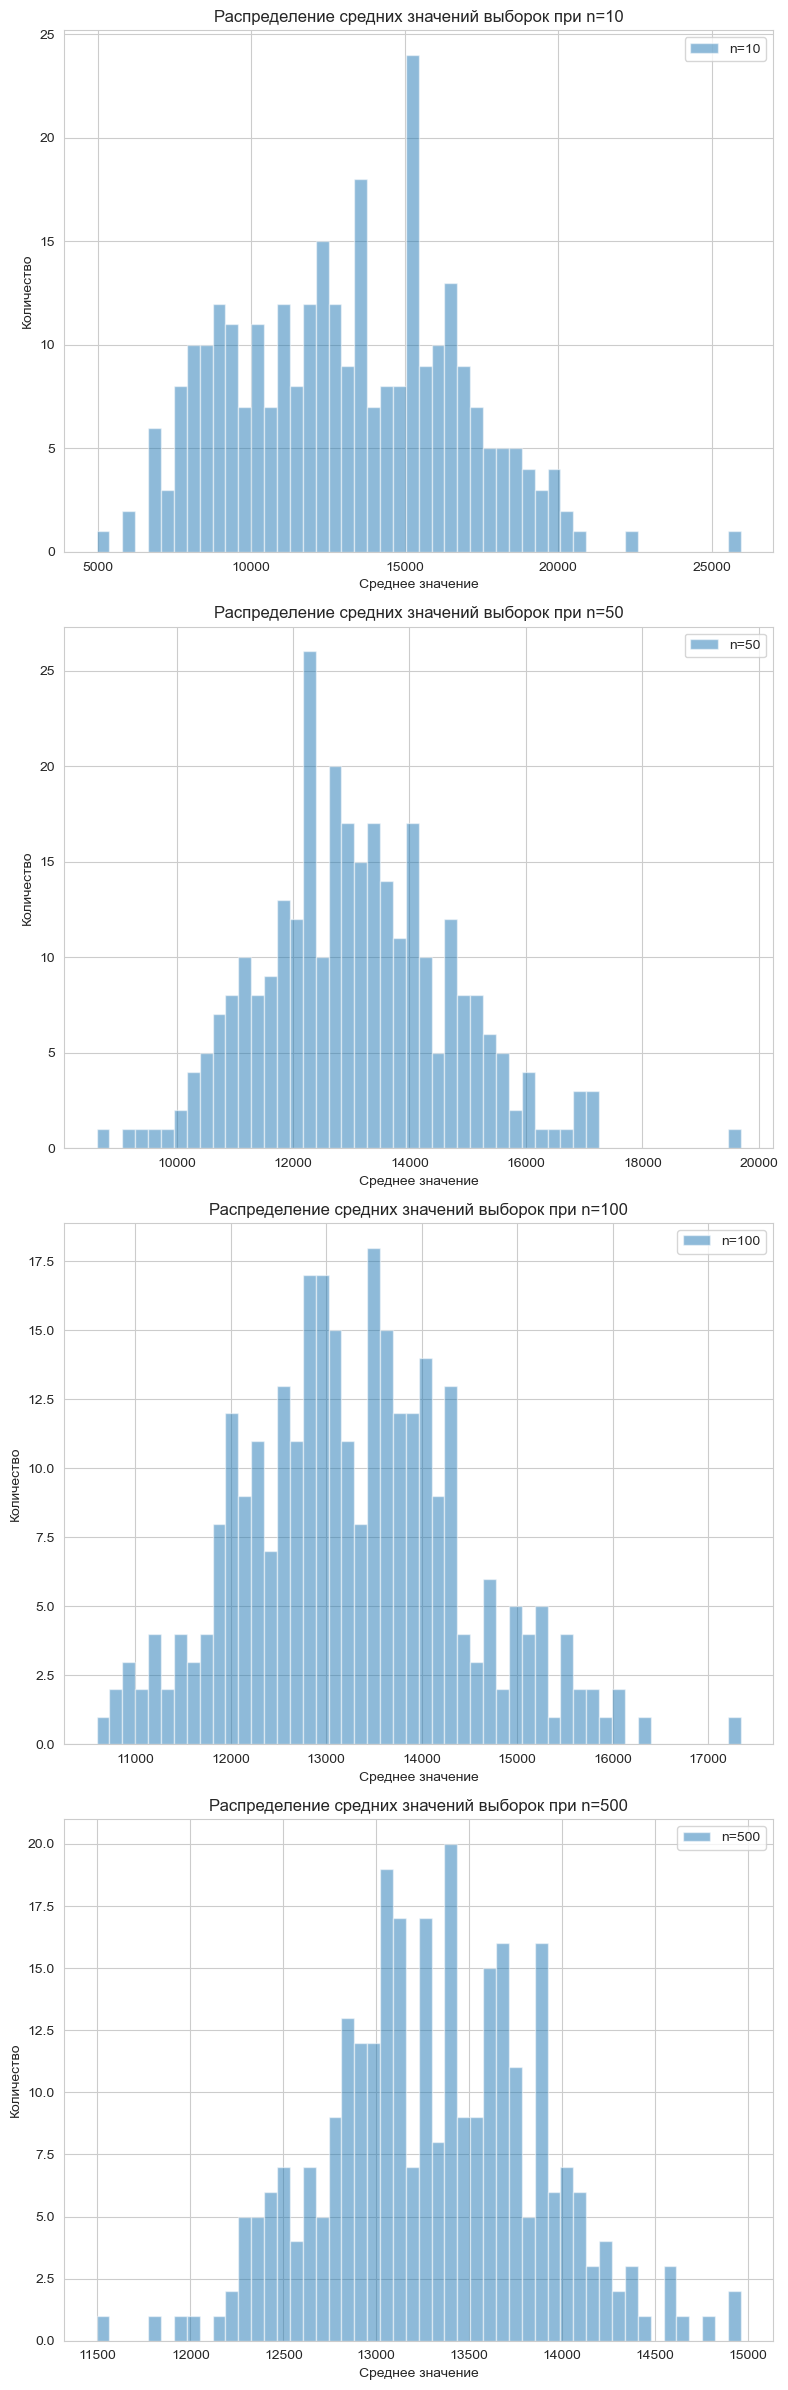

При n=10 стандартное отклонение средних значений выборок равно 3567.15
При n=10 среднее средних значений выборок равно 13076.85
При n=50 стандартное отклонение средних значений выборок равно 1628.68
При n=50 среднее средних значений выборок равно 13081.97
При n=100 стандартное отклонение средних значений выборок равно 1142.95
При n=100 среднее средних значений выборок равно 13285.57
При n=500 стандартное отклонение средних значений выборок равно 572.79
При n=500 среднее средних значений выборок равно 13306.79


In [6]:
import numpy as np

charges = df['charges']
n_values = [10, 50, 100, 500]
means = np.zeros((len(n_values), 300))
stds = np.zeros((len(n_values), 300))

for i, n in enumerate(n_values):
    for j in range(300):
        sample = np.random.choice(charges, size=n, replace=True)
        means[i, j] = np.mean(sample)
        stds[i, j] = np.std(sample)

fig, axs = plt.subplots(len(n_values), 1, figsize=(8, 6 * len(n_values)))

for i, n in enumerate(n_values):
    axs[i].hist(means[i, :], bins=50, alpha=0.5, label=f'n={n}')
    axs[i].set_title(f'Распределение средних значений выборок при n={n}')
    axs[i].set_xlabel('Среднее значение')
    axs[i].set_ylabel('Количество')
    axs[i].legend()

plt.tight_layout()
plt.show()

for i, n in enumerate(n_values):
    print(f'При n={n} стандартное отклонение средних значений выборок равно {np.std(means[i, :]):.2f}')
    print(f'При n={n} среднее средних значений выборок равно {np.mean(means[i, :]):.2f}')

In [7]:
from scipy import stats


charges = df['charges']
bmi = df['bmi']

charges_mean = np.mean(charges)
charges_std = np.std(charges)
bmi_mean = np.mean(bmi)
bmi_std = np.std(bmi)

charges_ci_95 = stats.t.interval(0.95, len(charges)-1, loc=charges_mean, scale=charges_std/np.sqrt(len(charges)))
charges_ci_99 = stats.t.interval(0.99, len(charges)-1, loc=charges_mean, scale=charges_std/np.sqrt(len(charges)))

bmi_ci_95 = stats.t.interval(0.95, len(bmi)-1, loc=bmi_mean, scale=bmi_std/np.sqrt(len(bmi)))
bmi_ci_99 = stats.t.interval(0.99, len(bmi)-1, loc=bmi_mean, scale=bmi_std/np.sqrt(len(bmi)))

print('95% доверительный интервал для среднего значения charges:')
print(charges_ci_95)
print('99% доверительный интервал для среднего значения charges:')
print(charges_ci_99)
print('95% доверительный интервал для среднего значения bmi:')
print(bmi_ci_95)
print('99% доверительный интервал для среднего значения bmi:')
print(bmi_ci_99)

95% доверительный интервал для среднего значения charges:
(12621.196780689985, 13919.647749592528)
99% доверительный интервал для среднего значения charges:
(12416.749133019599, 14124.095397262914)
95% доверительный интервал для среднего значения bmi:
(30.336469141876517, 30.99032458009658)
99% доверительный интервал для среднего значения bmi:
(30.233516308491083, 31.093277413482014)


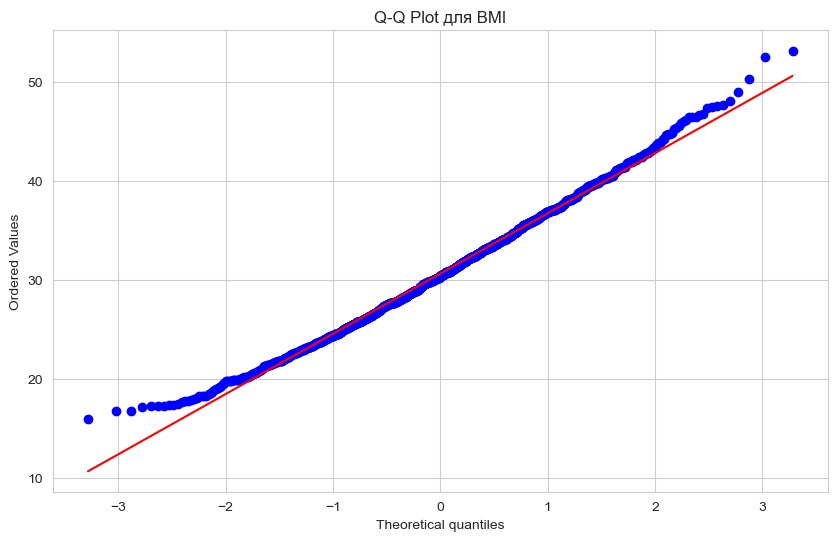

BMI - KS тест статистика: 0.0261, p-значение: 0.3145


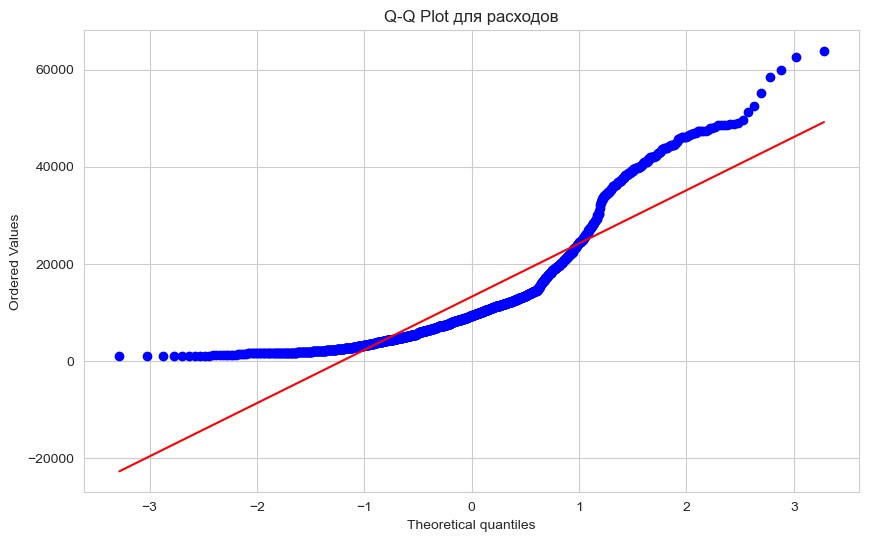

Charges - KS тест статистика: 0.1885, p-значение: 0.0000


In [9]:
df = pd.read_csv('insurance.csv')
ks_stat_bmi, p_value_bmi = stats.kstest(stats.zscore(df['bmi']), 'norm')

plt.figure(figsize=(10, 6))
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title('Q-Q Plot для BMI')
plt.show()

print(f'BMI - KS тест статистика: {ks_stat_bmi:.4f}, p-значение: {p_value_bmi:.4f}')
ks_stat_charges, p_value_charges = stats.kstest(stats.zscore(df['charges']), 'norm')

plt.figure(figsize=(10, 6))
stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title('Q-Q Plot для расходов')
plt.show()

print(f'Charges - KS тест статистика: {ks_stat_charges:.4f}, p-значение: {p_value_charges:.4f}')

In [10]:
# Загружаем данные
df = pd.read_csv('ecdccases.csv')

# Подсчитываем процент пропущенных значений
missing_percentages = (df.isnull().sum() / len(df)) * 100

print("Процент пропущенных значений по столбцам:")
for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}%")

# Находим два столбца с наибольшим количеством пропусков
columns_to_drop = missing_percentages.nlargest(2).index.tolist()

# Удаляем эти столбцы
df = df.drop(columns=columns_to_drop)

# Обработка оставшихся пропусков
for column in df.columns:
    if df[column].dtype == 'object':  # Для категориальных признаков
        df[column].fillna('other', inplace=True)
    else:  # Для числовых признаков
        df[column].fillna(df[column].median(), inplace=True)

final_check = df.isnull().sum().sum()
print(f"\nКоличество оставшихся пропусков: {final_check}")

print("\nСтатистика по данным:")
print(df.describe())

# поиск дней
high_deaths = df[df['deaths'] > 3000]
print("\nСтраны и дни с количеством смертей более 3000:")
print(high_deaths[['dateRep', 'countriesAndTerritories', 'deaths']])
print(f"Всего таких дней: {len(high_deaths)}")

# дубликаты
duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

# удаление дубликатов
df = df.drop_duplicates()
print(f"Размер данных после удаления дубликатов: {df.shape}")

Процент пропущенных значений по столбцам:
dateRep: 0.00%
day: 0.00%
month: 0.00%
year: 0.00%
cases: 0.00%
deaths: 0.00%
countriesAndTerritories: 0.00%
geoId: 0.44%
countryterritoryCode: 0.20%
popData2019: 0.20%
continentExp: 0.00%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: 4.65%

Количество оставшихся пропусков: 0

Статистика по данным:
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max 

C:\Users\stasp\AppData\Local\Temp\ipykernel_12640\2847514431.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('other', inplace=True)
C:\Users\stasp\AppData\Local\Temp\ipykernel_12640\2847514431.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [11]:
from scipy.stats import chisquare

observed = np.array([97, 98, 109, 95, 97, 104])
expected = np.array([100, 100, 100, 100, 100, 100])

chi2_stat, p_value = chisquare(observed, expected)

print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

Статистика хи-квадрат: 1.4400
p-значение: 0.9199


In [12]:
from scipy.stats import chi2_contingency

data = pd.DataFrame({
    'Женат': [89,17,11,43,22,1],
    'Гражданский брак': [80,22,20,35,6,4],
    'Не состоит в отношениях': [35,44,35,6,8,22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает',
              'На домохозяйстве', 'На пенсии', 'Учёба']

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

Статистика хи-квадрат: 122.2965
p-значение: 0.0000
